<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


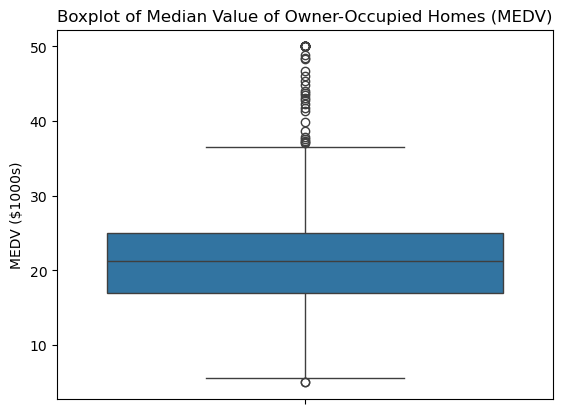

In [4]:
sns.boxplot(y=boston_df['MEDV'])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("MEDV ($1000s)")
pyplot.show()

Outliers are present above the upper whisker, indicating some homes have significantly higher values.

The median appears to be around $21,000 to $23,000.

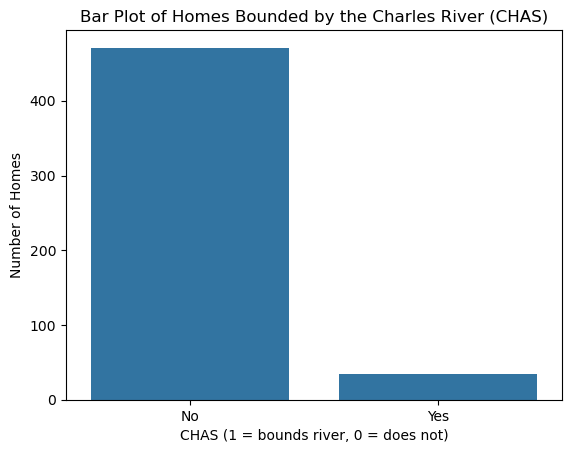

In [5]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()
sns.barplot(x=chas_counts.index, y=chas_counts.values)
pyplot.title("Bar Plot of Homes Bounded by the Charles River (CHAS)")
pyplot.xlabel("CHAS (1 = bounds river, 0 = does not)")
pyplot.ylabel("Number of Homes")
pyplot.xticks([0, 1], ["No", "Yes"])
pyplot.show()

Most homes are not bounded by the Charles River.

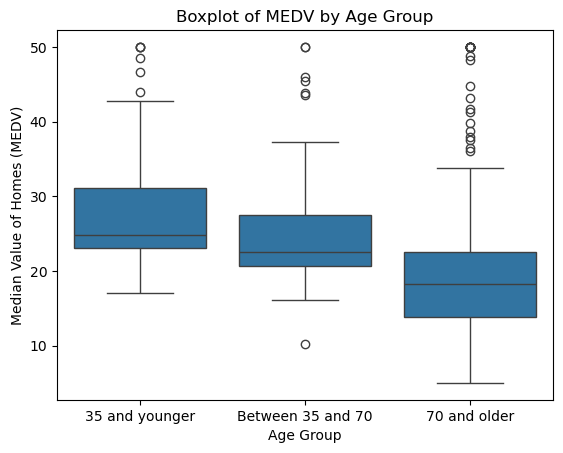

In [6]:
boston_df['AGE_GROUP'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=["35 and younger", "Between 35 and 70", "70 and older"]
)

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title("Boxplot of MEDV by Age Group")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median Value of Homes (MEDV)")
pyplot.show()

Homes in the younger neighborhoods (≤35 years) tend to have higher median values.

Older areas (especially "70 and older") show lower median home values with some outliers.

There's a decreasing trend in MEDV with increasing neighborhood age.

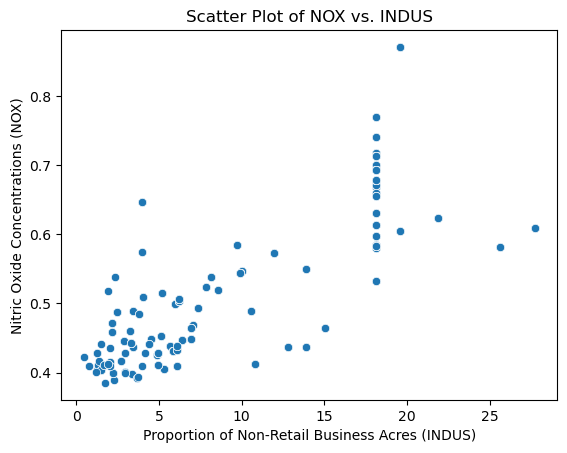

In [7]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("Scatter Plot of NOX vs. INDUS")
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.ylabel("Nitric Oxide Concentrations (NOX)")
pyplot.show()

There is a positive correlation between INDUS and NOX.

As the proportion of industrial land increases, NOX concentration also increases, indicating higher pollution in more industrialized areas.

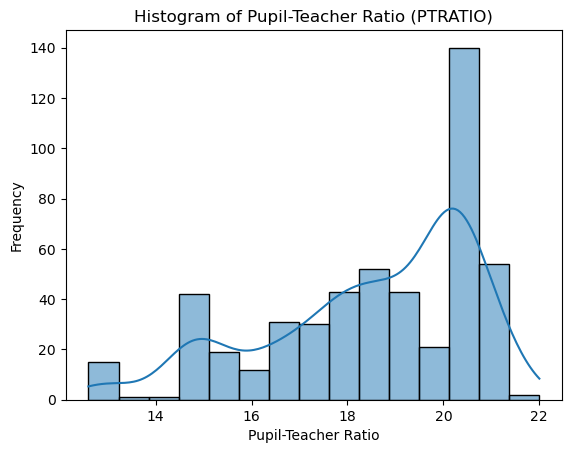

In [8]:
sns.histplot(boston_df['PTRATIO'], kde=True, bins=15)
pyplot.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

Most pupil-teacher ratios fall between 18 and 20.

The distribution is slightly right-skewed, indicating some areas have higher student-to-teacher ratios.

In [11]:
# null: no difference
# alternative: there is a difference

from scipy.stats import ttest_ind

medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = ttest_ind(medv_chas0, medv_chas1, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: -3.1133, P-value: 0.0036


P-value < 0.05, reject null hypothesis.

There is a statistically significant difference in MEDV between homes that are and aren't bounded by the Charles River.

In [12]:
# null: mean is equal across age groups
# alternative: at least one age group has a different MEDV

model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


P-value < 0.05, reject null hypothesis.

There is a significant difference in MEDV across age groups, indicating neighborhood age affects housing value.

In [13]:
# null: no correlation between NOX and INDUS
# alternative: there is a significant correlation

from scipy.stats import pearsonr

corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")

Correlation coefficient: 0.7637, P-value: 0.0000


P-value < 0.05 and strong positive correlation (r ≈ 0.76).

Reject null hypothesis, there is a statistically significant relationship between NOX and INDUS.

In [14]:
# null: no relationship between DIS and MEDV
# alternative: significant relationship

model = ols('MEDV ~ DIS', data=boston_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        03:18:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

P-value < 0.05, reject null hypothesis.

There is a statistically significant positive relationship between distance to employment centers (DIS) and home value (MEDV).

For each unit increase in DIS, MEDV increases by approx $1,091.60 (in $1000s units).